In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten

In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
folders = glob('chest_xray/train/*')
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



Epoch 1/2
522/522 [==============================] - 462s 819ms/step - loss: 0.2176 - accuracy: 0.9136 - val_loss: 0.5285 - val_accuracy: 0.8814
Epoch 2/2
522/522 [==============================] - 406s 777ms/step - loss: 0.1370 - accuracy: 0.9524 - val_loss: 0.4264 - val_accuracy: 0.9087


In [18]:
r.history

{'loss': [0.1910133957862854, 0.15479867160320282],
 'accuracy': [0.932898759841919, 0.9495782256126404],
 'val_loss': [0.5284687876701355, 0.42640936374664307],
 'val_accuracy': [0.8814102411270142, 0.9086538553237915]}

In [15]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

In [16]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_set, batch_size=16)
print("test loss, test acc:", results)

Evaluate on test data
63/63 [==============================] - 43s 682ms/step - loss: 0.4264 - accuracy: 0.9087
test loss, test acc: [0.42640939354896545, 0.9086538553237915]


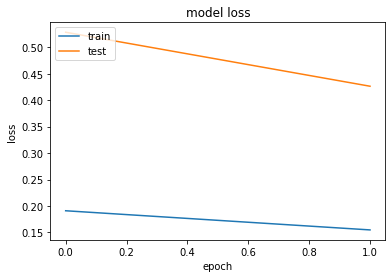

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

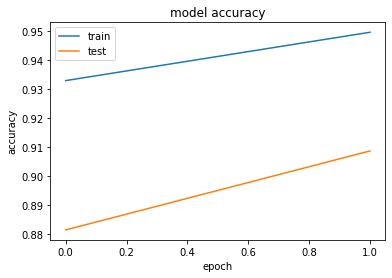

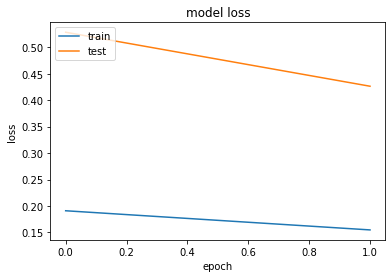

In [20]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1>Conclusion</h1>
<html>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
<body>
    <br>
    <b>Here are the results of Transfer Learning</b> 
<table border=1>
  <tr>
    <th>Model</th>
    <th>Architecture</th>
    <th>Training Accuracy</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>VGG 16</td>
    <td>Epoch = 2 Batch size = 10</td>
    <td>95.24%</td>
    <td>90.87%</td>
  </tr>
</table>
</body>
</html>

In [1]:
from keras.models import load_model

In [2]:
from keras.preprocessing import image

In [3]:
from keras.applications.vgg16 import preprocess_input

In [4]:
import numpy as np

In [5]:
model=load_model('chest_xray.h5')

In [40]:
img=image.load_img(r'C:\Users\gaura\Desktop\Pneumonia-Detection-using-Deep-Learning\Test Images\Normal.jpeg',target_size=(224,224))

In [41]:
x=image.img_to_array(img)

In [42]:
x=np.expand_dims(x, axis=0)

In [43]:
img_data=preprocess_input(x)

In [44]:
classes=model.predict(img_data)
print(classes)

[[1.0000000e+00 3.0523674e-22]]


In [45]:
print(classes[0])

[1.0000000e+00 3.0523674e-22]


In [46]:
result=int(classes[0][0])


In [48]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal


In [49]:
img=image.load_img(r'C:\Users\gaura\Desktop\Pneumonia-Detection-using-Deep-Learning\Test Images\Pneumonia.jpeg',target_size=(224,224))

In [50]:
x=image.img_to_array(img)

In [51]:
x=np.expand_dims(x, axis=0)

In [52]:
img_data=preprocess_input(x)

In [53]:
classes=model.predict(img_data)
print(classes)

[[0. 1.]]


In [54]:
print(classes[0])

[0. 1.]


In [55]:
result=int(classes[0][0])


In [56]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA
